# PROJET CLASSIFI# INTRODUCTIONCATION D'IMAGES HEMATIES

###  INTRODUCTION

#### Contexte et Importance du projet:

Le paludisme est une maladie infectieuse grave, transmise par les moustiques, qui touche des millions de personnes chaque année, principalement dans les régions tropicales et subtropicales. 
La détection précoce et précise de cette maladie est cruciale pour le traitement efficace et la réduction de la mortalité. Cependant, le diagnostic repose souvent sur l'examen microscopique des frottis sanguins, une procédure qui peut être longue et nécessitant une expertise médicale spécialisée.

#### Objectif du Projet
L'objectif de ce projet est de développer et d'entraîner un modèle de réseau de neurones convolutifs (CNN) capable de différencier les hématies infectées par le paludisme de celles qui sont saines. 
Un tel modèle pourrait considérablement accélérer le processus de diagnostic et augmenter sa précision, en offrant une assistance automatisée aux professionnels de santé.
[image]()
Une petite image ![image](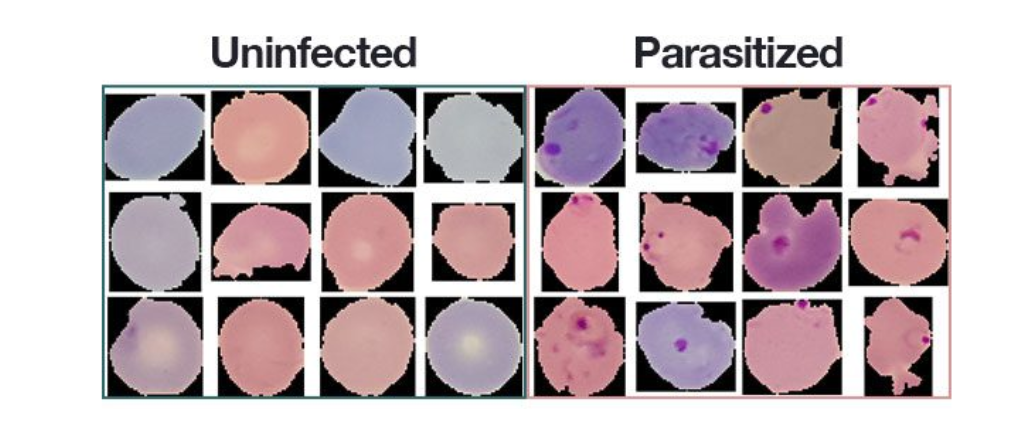)


### I) Manipulation de la donnée

Les données proviennent du site officiel des [NIH]("https://ceb.nlm.nih.gov/repositories/malaria-datasets/"). 



In [1]:
# chargement des données 
import pandas 
import cv2
import os 
import numpy 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import img_to_array, load_img




### 1. Chargement des données 

In [2]:

data_path = "C:/HETIC\Mes projets/classification_image_hematie/malaria_hematie_dataset"
os.chdir(data_path)

In [3]:
os.listdir("parasitized")

['image_10000.png',
 'image_10001.png',
 'image_10002.png',
 'image_10003.png',
 'image_10004.png',
 'image_10005.png',
 'image_10006.png',
 'image_10007.png',
 'image_10009.png',
 'image_10010.png',
 'image_10012.png',
 'image_10014.png',
 'image_10015.png',
 'image_10016.png',
 'image_10018.png',
 'image_10020.png',
 'image_10022.png',
 'image_10027.png',
 'image_10033.png',
 'image_10035.png',
 'image_10036.png',
 'image_10037.png',
 'image_10043.png',
 'image_10047.png',
 'image_10049.png',
 'image_10051.png',
 'image_10053.png',
 'image_10057.png',
 'image_10058.png',
 'image_10059.png',
 'image_10061.png',
 'image_10066.png',
 'image_10067.png',
 'image_10068.png',
 'image_10069.png',
 'image_10070.png',
 'image_10074.png',
 'image_10079.png',
 'image_10080.png',
 'image_10082.png',
 'image_10083.png',
 'image_10085.png',
 'image_10086.png',
 'image_10087.png',
 'image_10088.png',
 'image_10089.png',
 'image_10091.png',
 'image_10094.png',
 'image_10097.png',
 'image_101.png',
 '

for image_load in os.listdir('parasitized'):
    image = cv2.imread(image_load, cv2.IMREAD_COLOR)
    cv2.imshow("image", image)
cv2.waitKey(0)

In [4]:
data_dir = os.path.splitext(data_path)[0]

image_count = 0
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".png"):
            image_count += 1

print(image_count)


27558


In [5]:
# on peut importer nos datasets 

uninfected_dir = os.path.join(data_dir, "Uninfected")
parasitized_dir = os.path.join(data_dir, "Parasitized")

uninfected_count = len([file for file in os.listdir(uninfected_dir) if os.path.isfile(os.path.join(uninfected_dir, file))])
parasitized_count = len([file for file in os.listdir(parasitized_dir) if os.path.isfile(os.path.join(parasitized_dir, file))])

print("Number of uninfected cells:", uninfected_count)
print("Number of parasitized cells:", parasitized_count)


Number of uninfected cells: 13779
Number of parasitized cells: 13779


### afficher l'image avec openCV

In [45]:
"""
def load_and_display_image(data_dir, directory_name, index):
    # Chemin d'accès au répertoire des images
    directory_path = os.path.join(data_dir, directory_name)

    # Liste des fichiers dans le répertoire
    files = os.listdir(directory_path)

    # Vérifier si l'index est valide
    if index < len(files):
        # Sélectionnez le fichier spécifique à lire
        chosen_file = files[index]

        # Chemin d'accès complet de l'image choisie
        image_path = os.path.join(directory_path, chosen_file)

        # Lecture de l'image avec OpenCV
        image = cv2.imread(image_path)

        # Vérification si l'image est lue avec succès
        if image is not None:
            # Affichage de l'image
            cv2.imshow("Image", image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print("Failed to load image.")
    else:
        print("Invalid index.")

# Exemple d'utilisation
data_dir = "C:/HETIC\Mes projets/classification_image_hematie/malaria_hematie_dataset"
directory_name = "Uninfected"
index = 9  # Vous pouvez modifier l'index selon votre besoin
"""


'\ndef load_and_display_image(data_dir, directory_name, index):\n    # Chemin d\'accès au répertoire des images\n    directory_path = os.path.join(data_dir, directory_name)\n\n    # Liste des fichiers dans le répertoire\n    files = os.listdir(directory_path)\n\n    # Vérifier si l\'index est valide\n    if index < len(files):\n        # Sélectionnez le fichier spécifique à lire\n        chosen_file = files[index]\n\n        # Chemin d\'accès complet de l\'image choisie\n        image_path = os.path.join(directory_path, chosen_file)\n\n        # Lecture de l\'image avec OpenCV\n        image = cv2.imread(image_path)\n\n        # Vérification si l\'image est lue avec succès\n        if image is not None:\n            # Affichage de l\'image\n            cv2.imshow("Image", image)\n            cv2.waitKey(0)\n            cv2.destroyAllWindows()\n        else:\n            print("Failed to load image.")\n    else:\n        print("Invalid index.")\n\n# Exemple d\'utilisation\ndata_dir = "C

In [7]:
load_and_display_image(data_dir, directory_name, index)

In [8]:

from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
def load_data(data_dir): 
    images =[]
    labels= []

    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path): 
            label = folder
            for file in os.listdir(folder_path): 
                try: 
                    image_path = os.path.join(folder_path, file)
                    image = Image.open(image_path)
                    img_resized = image.resize((128, 128))
                    image_array = numpy.array(img_resized)
                    images.append(image_array)
                    labels.append(label)
                except Exception as e:
                    print(f"erreur dans la lecture  de {image_path}: {str(e)}")
    return images, labels

data_dir = "C:/HETIC\Mes projets/classification_image_hematie/malaria_hematie_dataset"
images, labels = load_data(data_dir)

In [38]:
import pandas
label_dataframe = pandas.DataFrame(labels, columns=["type"])
label_dataframe




,type
0,parasitized
1,parasitized
2,parasitized
3,parasitized
4,parasitized
...,...
27553,uninfected
27554,uninfected
27555,uninfected
27556,uninfected


#### Normalisation 

In [39]:
images = numpy.array(images) / 255.0

In [47]:
images.shape

(27558, 128, 128, 3)

### Label encodés

In [40]:
# encoder les labels 
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)


In [41]:
print(f"la taille des labels est: {len(encoded_labels)}")

la taille des labels est: 27558


In [ ]:
encoded_labels

#### Data Augmentation

In [42]:
data_augmentor = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)


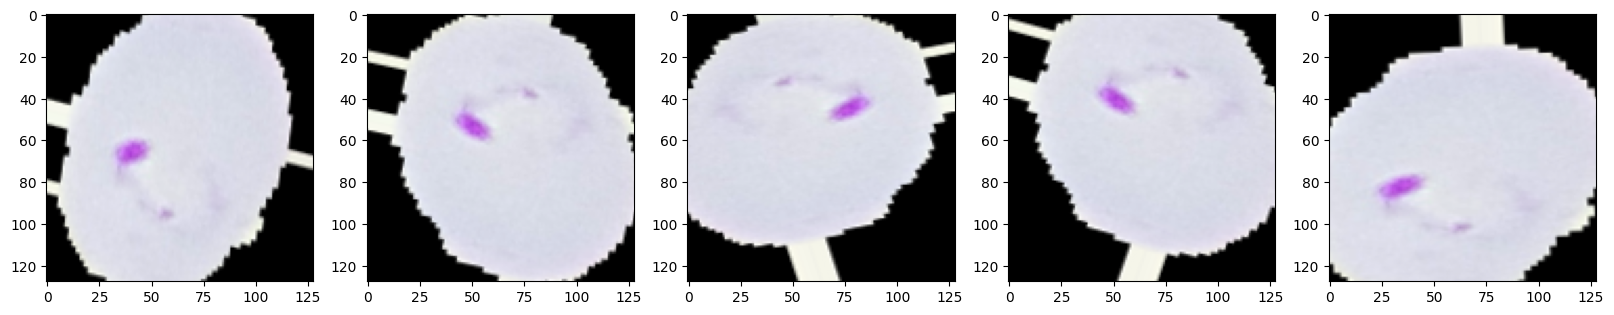

In [43]:
import matplotlib.pyplot as plt

augmented_images = []
for i in range(5):  # Nombre d'images à afficher
    augmented_image = data_augmentor.random_transform(images[0])
    augmented_images.append(augmented_image)

fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for ax, image in zip(axes, augmented_images):
    ax.imshow(image)
plt.show()

### Modélisation

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.applications import VGG16, ResNet50


In [51]:
# Callback pour arrêter l'entraînement prématurément si la perte de validation cesse de s'améliorer
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Callback pour réduire le taux d'apprentissage lorsque la performance cesse de s'améliorer
lr_decay = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.1, min_lr=0.00001)

# Determiner les dimensions (width and height) pour notre preprocessed images
IMAGE_HEIGHT, IMAGE_WIDTH, channels = images.shape[1:]

# implémentation des 3 CNN 

# Modèle CNN from scratch avec Sequential
model_scratch = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Fine-tuning du VGG16 pré-entraîné sur ImageNet
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for layer in vgg16_base.layers:
    layer.trainable = False

model_vgg16 = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Fine-tuning du ResNet50 pré-entraîné sur ImageNet
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for layer in resnet50_base.layers:
    layer.trainable = False

model_resnet50 = Sequential([
    resnet50_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



C:\HETIC\env_cours\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [53]:
from sklearn.model_selection import train_test_split

# Divisez les données en ensembles d'entraînement et de validation
train_images, val_images, train_labels, val_labels = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)



In [ ]:
# Entraînement des 3 modèles à l'aide des Callbacks implémentés
batch_size = 32
epochs = 10

models = [model_scratch, model_vgg16, model_resnet50]
for model in models:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(train_images, train_labels, validation_data=(val_images, val_labels), 
        batch_size=batch_size, epochs=epochs, callbacks=[early_stopping, lr_decay])


In [ ]:
# Sauvegarder les poids des 3 différents modèles
for i, model in enumerate(models):
    model.save_weights(f'model_weights_{i}.h5')

### III) Test des Modèles



#### 1) Calculer la Matrice de Confusion
Utilisez `confusion_matrix` de `sklearn` pour calculer la matrice de confusion de chaque modèle sur le jeu de test.

#### 2) Calculer les métriques de performance
Pour chaque modèle, calculez les métriques suivantes : accuracy, precision, f1-score, recall, sensibilité et spécificité. Utilisez les fonctions de `sklearn.metrics`.


#### 3) Afficher le graphique ROC et calcule l’AUC de chacun des 3 modèles.
Interprétez les résultats obtenus 
